In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('/Users/kelly/Desktop/github-fun-projects/city-of-new-york-air-quality-measurement/data/clean_data.csv')

# List of NYC boroughs
nyc_boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

# Filter data for mcg/m3, µg/m3, and Annual Average
air_quality_data = data[(data['Measure Info'] == 'mcg/m3') | (data['Measure Info'] == 'µg/m3')]
annual_avg_data = air_quality_data[air_quality_data['Time Period'].str.contains('Annual Average')]

# Filter data for specified boroughs
borough_data = annual_avg_data[annual_avg_data['Geo Place Name'].isin(nyc_boroughs)]

# Extract year from Time Period using assign (or .loc if preferred)
borough_data = borough_data.assign(Year=borough_data['Time Period'].str.extract(r'(\d{4})').astype(int))

# Group by Geo Place Name and Year, then calculate min and max for Data Value
borough_stats_min = borough_data.groupby(['Geo Place Name', 'Year'])['Data Value'].agg(['min']).reset_index()
borough_stats_max = borough_data.groupby(['Geo Place Name', 'Year'])['Data Value'].agg(['max']).reset_index()

# Find rows with min and max values, prioritizing the most recent year
min_values = borough_stats_min.loc[borough_stats_min.groupby('Geo Place Name')['min'].idxmin()].groupby('Geo Place Name').first()
max_values = borough_stats_max.loc[borough_stats_max.groupby('Geo Place Name')['max'].idxmax()].groupby('Geo Place Name').first()

print(min_values)
print(max_values)


                Year  min
Geo Place Name           
Bronx           2020  6.1
Brooklyn        2022  5.8
Manhattan       2022  7.0
Queens          2022  5.7
Staten Island   2022  5.2
                Year   max
Geo Place Name            
Bronx           2009  11.1
Brooklyn        2009  10.5
Manhattan       2009  12.6
Queens          2009  10.1
Staten Island   2009   9.8


In [9]:
print(min_values.columns)


Index(['index', 'Geo Place Name', 'Year', 'min'], dtype='object')


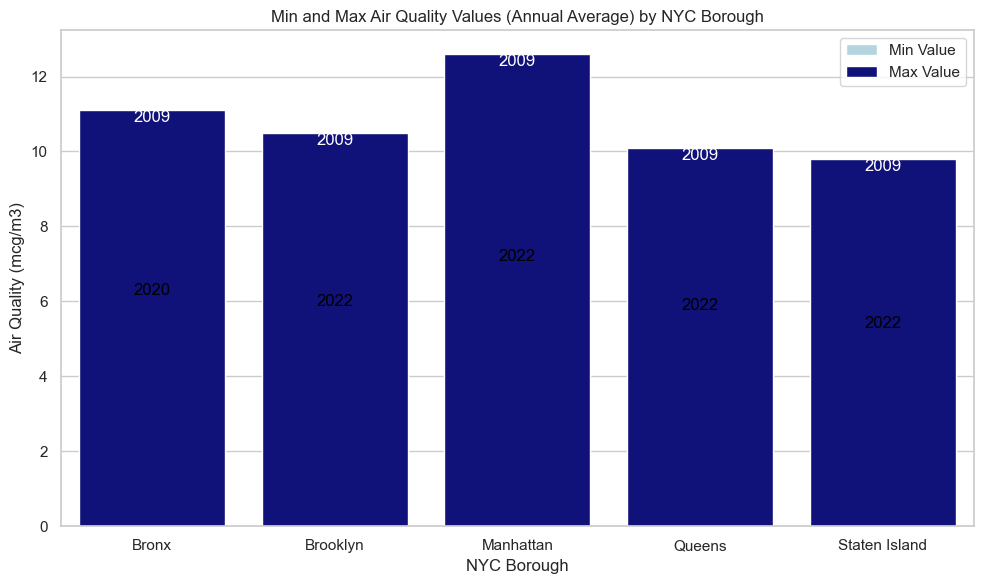

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the index for min and max values to prepare for plotting
min_values = min_values.reset_index()
max_values = max_values.reset_index()

# Create a new DataFrame for plotting, combining min and max values
plot_data = pd.DataFrame({
    'Borough': min_values['Geo Place Name'],
    'Min Value': min_values['min'],
    'Min Year': min_values['Year'],
    'Max Value': max_values['max'],
    'Max Year': max_values['Year']
})

# Set up the figure and axis
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot min values
sns.barplot(x='Borough', y='Min Value', data=plot_data, color='lightblue', label='Min Value')

# Overlay max values
sns.barplot(x='Borough', y='Max Value', data=plot_data, color='darkblue', label='Max Value')

# Annotate the years for min and max values
for index, row in plot_data.iterrows():
    plt.text(index, row['Min Value'], f'{row["Min Year"]}', color='black', ha="center", va="bottom")
    plt.text(index, row['Max Value'], f'{row["Max Year"]}', color='white', ha="center", va="top")

# Add labels and title
plt.xlabel('NYC Borough')
plt.ylabel('Air Quality (mcg/m3)')
plt.title('Min and Max Air Quality Values (Annual Average) by NYC Borough')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
